In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('/content/drive/MyDrive/HR_Analytics.csv')

In [3]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [4]:
df.isnull().sum()

,0
EmpID,0
Age,0
AgeGroup,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0


In [5]:
df.shape

(1480, 38)

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,2.725000,6504.985811,14298.460811,2.687162,15.210135,3.153378,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,1.104137,4700.261400,7112.056802,2.494098,3.655338,0.360474,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2922.250000,8051.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4933.000000,14220.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8383.750000,20460.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.nunique()

,0
EmpID,1470
Age,43
AgeGroup,5
Attrition,2
BusinessTravel,4
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6


In [15]:
 One-Hot Encoding for multi-class columns
multi_class_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole']
df = pd.get_dummies(df, columns=multi_class_columns, drop_first=True)

 Display transformed dataset
df.head()


,EmpID,Age,AgeGroup,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_TravelRarely,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,RM297,18,18-25,1,230,3,3,1,405,3,1,54,3,1,3,2,1420,Upto 5k,25233,1,Y,0,13,3,3,80,0,0,2,3,0,0,0,0.0,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False
1,RM302,18,18-25,0,812,10,3,1,411,4,0,69,2,1,3,2,1200,Upto 5k,9724,1,Y,0,12,3,1,80,0,0,2,3,0,0,0,0.0,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
2,RM458,18,18-25,1,1306,5,3,1,614,2,1,69,3,1,2,2,1878,Upto 5k,8059,1,Y,1,14,3,4,80,0,0,3,3,0,0,0,0.0,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
3,RM728,18,18-25,0,287,5,2,1,1012,2,1,73,3,1,4,2,1051,Upto 5k,13493,1,Y,0,15,3,4,80,0,0,2,3,0,0,0,0.0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False
4,RM829,18,18-25,1,247,8,1,1,1156,3,1,80,3,1,3,2,1904,Upto 5k,13556,1,Y,0,12,3,4,80,0,0,0,3,0,0,0,0.0,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False


In [17]:
# Label Encoding for binary columns
binary_columns = ['Attrition', 'Gender', 'OverTime','MaritalStatus',
                  'BusinessTravel_TravelRarely','BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely',
                  'Department_Research & Development','Department_Sales','EducationField_Life Sciences',
                  'EducationField_Marketing','EducationField_Medical','EducationField_Other',
                  'EducationField_Technical Degree','JobRole_Human Resources',
                  'JobRole_Laboratory Technician','JobRole_Manager','JobRole_Manufacturing Director',
                  'JobRole_Research Director','JobRole_Research Scientist','JobRole_Sales Executive',
                  'JobRole_Sales Representative'
                  ]
le = LabelEncoder()
for col in binary_columns:
    df[col] = le.fit_transform(df[col])


In [19]:
df.head()

,EmpID,Age,AgeGroup,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_TravelRarely,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,RM297,18,18-25,1,230,3,3,1,405,3,1,54,3,1,3,2,1420,Upto 5k,25233,1,Y,0,13,3,3,80,0,0,2,3,0,0,0,0.0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,RM302,18,18-25,0,812,10,3,1,411,4,0,69,2,1,3,2,1200,Upto 5k,9724,1,Y,0,12,3,1,80,0,0,2,3,0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,RM458,18,18-25,1,1306,5,3,1,614,2,1,69,3,1,2,2,1878,Upto 5k,8059,1,Y,1,14,3,4,80,0,0,3,3,0,0,0,0.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,RM728,18,18-25,0,287,5,2,1,1012,2,1,73,3,1,4,2,1051,Upto 5k,13493,1,Y,0,15,3,4,80,0,0,2,3,0,0,0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,RM829,18,18-25,1,247,8,1,1,1156,3,1,80,3,1,3,2,1904,Upto 5k,13556,1,Y,0,12,3,4,80,0,0,0,3,0,0,0,0.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [26]:
# List of columns to drop
#columns_to_drop = ['EmpID','EmployeeNumber','AgeGroup','SalarySlab','YearsWithCurrManager']

# Drop these columns
#df = df.drop(columns=columns_to_drop)


In [28]:
df.drop('Over18',axis=1,inplace=True)

In [29]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel_TravelRarely,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,18,1,230,3,3,1,3,1,54,3,1,3,2,1420,25233,1,0,13,3,3,80,0,0,2,3,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,18,0,812,10,3,1,4,0,69,2,1,3,2,1200,9724,1,0,12,3,1,80,0,0,2,3,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,18,1,1306,5,3,1,2,1,69,3,1,2,2,1878,8059,1,1,14,3,4,80,0,0,3,3,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,18,0,287,5,2,1,2,1,73,3,1,4,2,1051,13493,1,0,15,3,4,80,0,0,2,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,18,1,247,8,1,1,3,1,80,3,1,3,2,1904,13556,1,0,12,3,4,80,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [37]:
#Model

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.82%


In [39]:
#Model Evaluation
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Display a classification report for more metrics

print(classification_report(y_test, y_pred))


Confusion Matrix:
[[248   1]
 [ 38   9]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       249
           1       0.90      0.19      0.32        47

    accuracy                           0.87       296
   macro avg       0.88      0.59      0.62       296
weighted avg       0.87      0.87      0.83       296



In [44]:
#auc_roc_curve
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {auc_score}")


ROC AUC Score: 0.8394001538067163


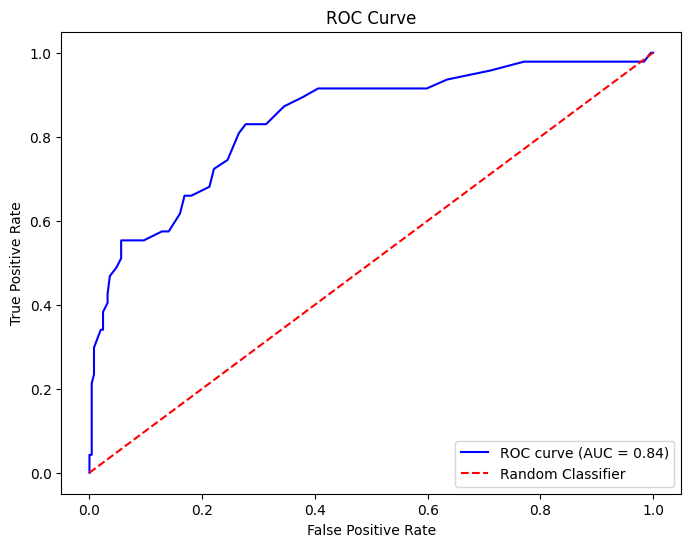

In [43]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


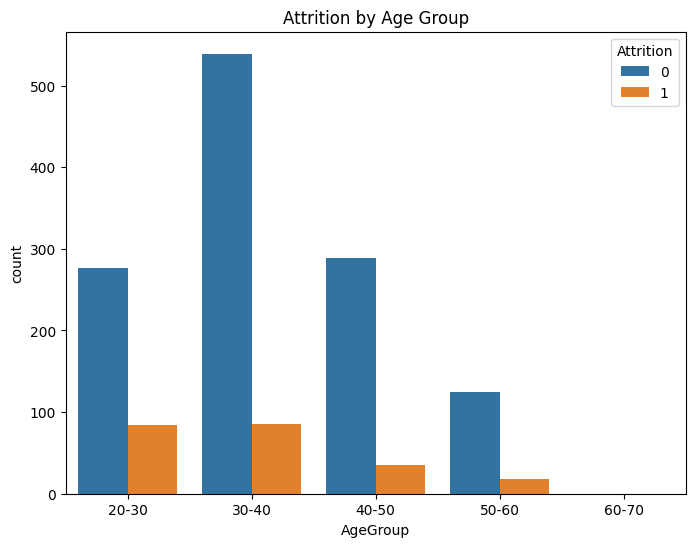

In [51]:
# Create age bins
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Visualize attrition by age group
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Attrition', data=df)
plt.title("Attrition by Age Group")
plt.show()


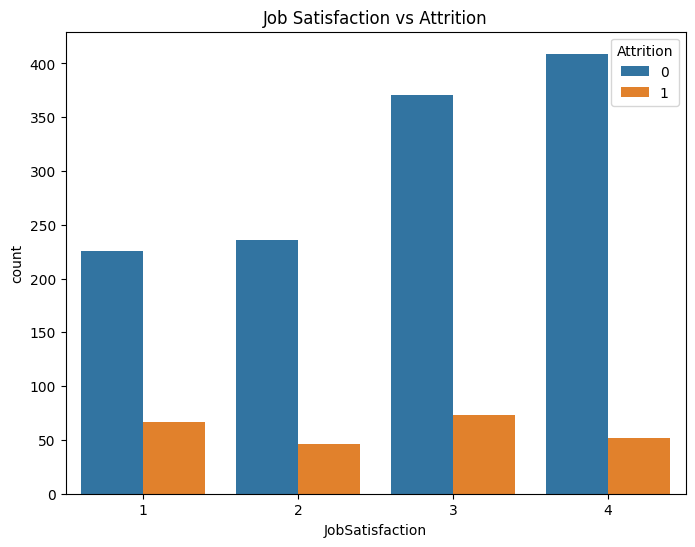

In [53]:
# Visualize job satisfaction vs attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()


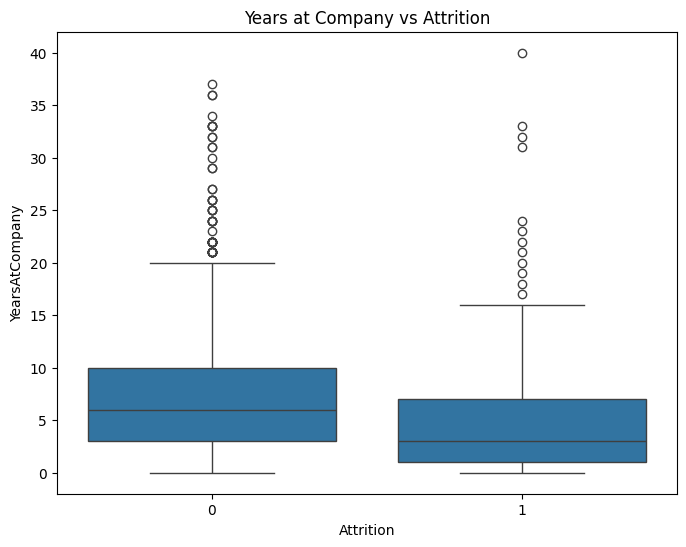

In [56]:
# Visualize years at company vs attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title("Years at Company vs Attrition")
plt.show()
